In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\\DataSet\\covid_toy.csv")
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [3]:
df.shape

(100, 6)

In [13]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [12]:
col = [var for var in df.columns if df[var].isnull().mean() > 0.05 and df[var].isnull().mean() > 0]
col

['fever']

In [17]:
df[col].sample(4)

,fever
34,102.0
48,99.0
71,104.0
28,104.0


In [19]:
len(df[col].isnull().mean()) / len(df)

0.01

In [20]:
new_df = df[col].dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

In [23]:
import matplotlib.pyplot as plt

<Axes: >

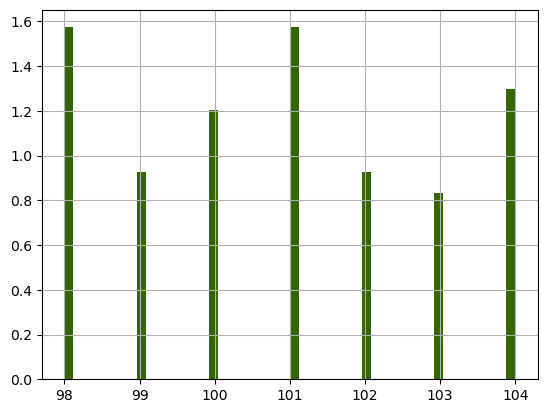

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

df["fever"].hist(bins=50, ax=ax, density=True, color="red")
new_df["fever"].hist(bins=50, ax=ax, density=True, color="green", alpha=0.8)

In [29]:
temp = pd.concat([
    df["fever"].value_counts() / len(df),
    df["fever"].value_counts() / len(new_df)
], axis=1)

temp.columns = ["original", "cca"]

temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000
